In [1]:
from functions_training_pipeline import Model
import functions_training_pipeline as f

import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [2]:
rf = f.load_object('RF_test_2023_04_17')
dt = f.load_object('DT_test')

In [3]:
def model_comparison_table(model_list):
    """
    This function creates a table with the results of the models in the model_list.
    
    Args:
        model_list (list): List of models to be compared.

    Returns:
        table (pd.DataFrame): Table with the results of the models in the model_list.
    """
    table = pd.concat([i.get_results() for i in model_list])
    set_index = table.pop('Set')
    multiindex = [[model.name for model in model_list for _ in range(2)], 
                set_index]
    table.index = multiindex
    table.index.names = ['Model', 'Set']
    return table


In [4]:
ll = [rf, dt]
model_comparison_table(ll).reset_index()

,Model,Set,RMSE,RMSE_std,R2,R2_std
0,RF_test_2023_04_17,Train,0.704961,0.057279,0.290228,0.035167
1,RF_test_2023_04_17,Test,1.469092,0.592755,-0.845890,1.095800
2,DT_test,Train,0.083774,0.006762,0.475871,0.049463
3,DT_test,Test,0.127109,0.027293,-0.093088,0.577532


In [14]:
def model_comparison_plot(model_list, metric='RMSE'):
    """
    Creates a bar plot comparing the train and test metric values for a list of models.
    
    Args:
        model_list (list): A list of Model objects.

        metric (str): The metric to plot. 'RMSE' or 'R2'.
    """
    table = model_comparison_table(model_list).reset_index()
    model_names = table['Model'].unique()

    # Set the figure size and create a bar plot
    fig, ax = plt.subplots( figsize=(10,6))
    width = 0.35
    train_color = 'steelblue'  # Choose a color for the train set bars
    test_color = 'darkorange'  # Choose a color for the test set bars
    for i, model in enumerate(model_names):
        # Get the train and test metric values for the current model
        train_val = table[(table['Model'] == model) & (table['Set'] == 'Train')][metric].values[0]
        test_val = table[(table['Model'] == model) & (table['Set'] == 'Test')][metric].values[0]
        # Get the train and test metric standard deviation values for the current model
        train_val_std = table[(table['Model'] == model) & (table['Set'] == 'Train')][metric + '_std'].values[0]
        test_val_std = table[(table['Model'] == model) & (table['Set'] == 'Test')][metric + '_std'].values[0]
        # Create the bar plot
        ax.bar(i-width/2, train_val, width, yerr=train_val_std, label=None, capsize=10, color=train_color)
        ax.bar(i+width/2, test_val, width, yerr=test_val_std, label=None, capsize=10, color=test_color)

    # Add the legend
    ax.legend(['Train', 'Test'], loc='upper right')

    # Set the axis labels
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(model_names)

    # Show the plot
    plt.show()

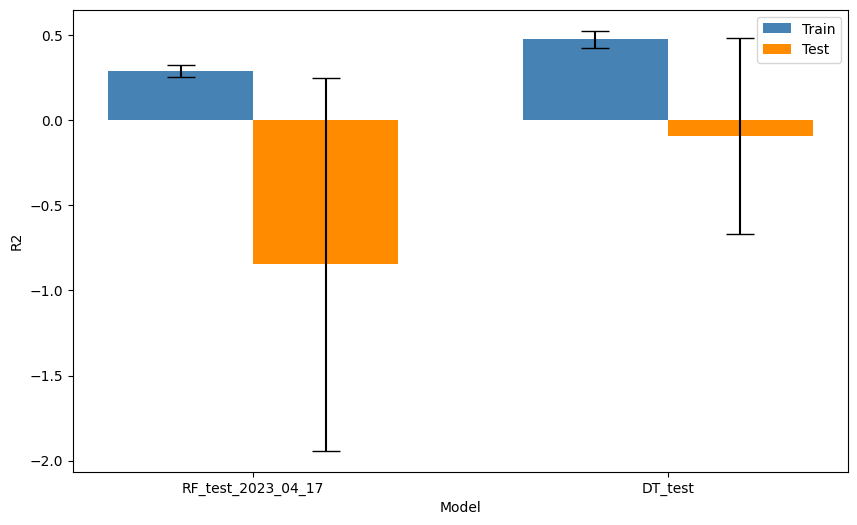

In [16]:
model_comparison_plot(ll, metric='R2')